In [12]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

import tidalsim.modeling.extrapolation as tme

import importlib
importlib.reload(tme)

<module 'tidalsim.modeling.extrapolation' from '/scratch/vighneshiyer/chipyard/tools/tidalsim/tidalsim/modeling/extrapolation.py'>

In [13]:
def get_run_dir(binary: str) -> Path:
    return Path.cwd().parent / "runs" / binary

interval_length = 1000
clusters = 12
run_dir = get_run_dir("aha-mont64-fb8c96bc")
perf_data_tidalsim = tme.analyze_tidalsim_results(run_dir, interval_length, clusters)

In [14]:
perf_data_reference = tme.parse_reference_perf(Path.cwd().parent.parent.parent / "sims" / "vcs" / "aha-mont64_perf.csv", interval_length)

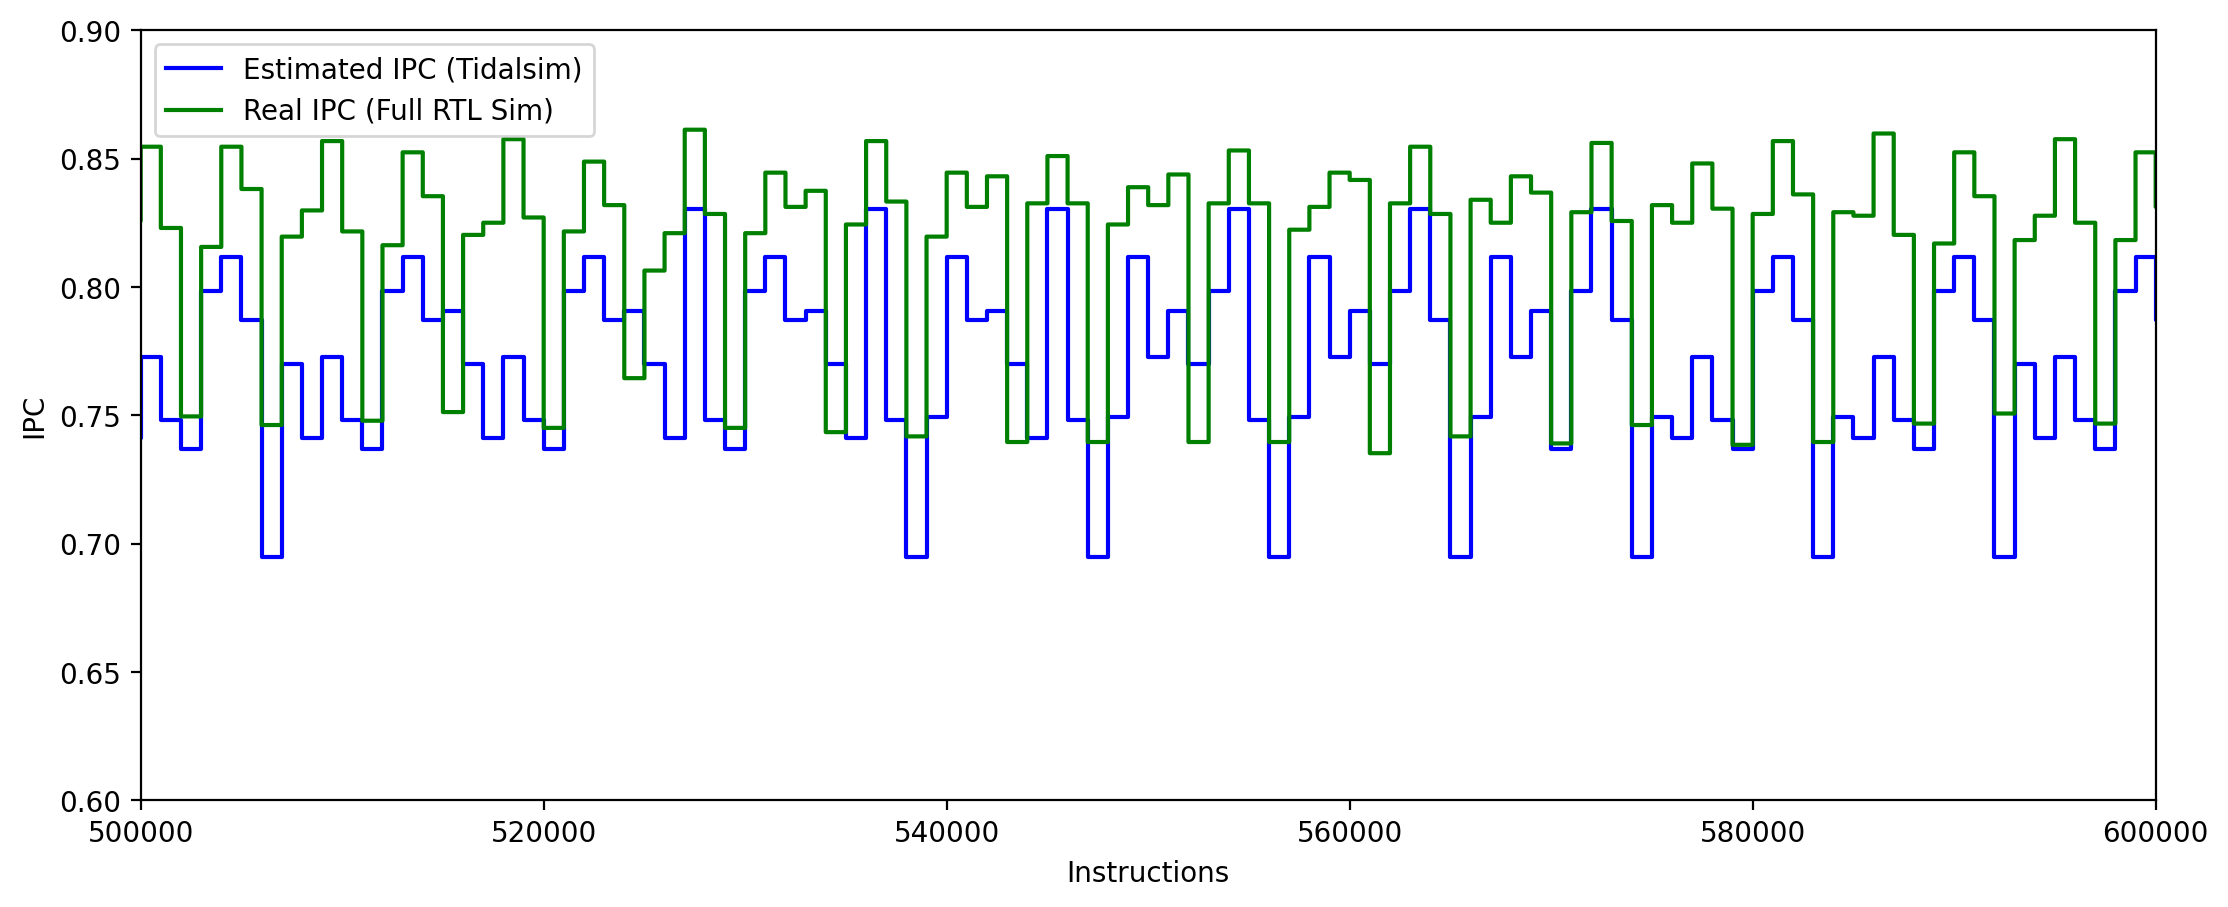

In [15]:
plt.plot(perf_data_tidalsim['inst_count'], perf_data_tidalsim['ipc'], 'b')
plt.plot(perf_data_reference['inst_count'], perf_data_reference['ipc'], 'g')
plt.xlabel('Instructions')
plt.ylabel('IPC')
plt.xlim([0.5e6,0.6e6])
plt.ylim([0.6, 0.9])
plt.legend(['Estimated IPC (Tidalsim)', 'Real IPC (Full RTL Sim)'])
fig = plt.gcf()
fig.set_size_inches(13, 5)
plt.savefig('ipc.png', dpi=300)